# Analyse

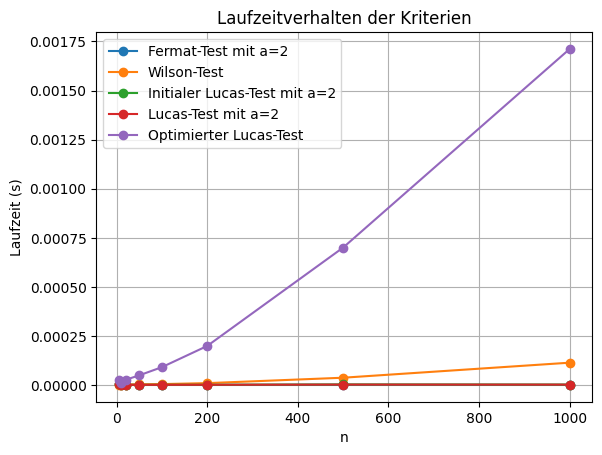

In [2]:
from src.primality.criteria import *
from src.primality.tests import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime

# Beispielhafte n-Werte
#numbers = list(range(10_000, 10_500, 50))


# Liste von Zahlen, für die die Tests durchgeführt werden sollen
numbers = [5, 10, 20, 50, 100, 200, 500, 1000]

# Messung der Laufzeiten für jedes Kriterium
fermat_results = measure_runtime(lambda n: fermat_criterion(a=2, n=n), numbers, label="Fermat-Test mit a=2")
wilson_results = measure_runtime(lambda n: wilson_criterion(n), numbers, label="Wilson-Test")
initial_lucas_results = measure_runtime(lambda n: initial_lucas_test(a=2, n=n), numbers, label="Initialer Lucas-Test mit a=2")
lucas_results = measure_runtime(lambda n: lucas_test(a=2, n=n), numbers, label="Lucas-Test mit a=2")
optimized_lucas_results = measure_runtime(lambda n: optimized_lucas_test(n), numbers, label="Optimierter Lucas-Test")

# Vorbereitung der Daten für den Plot
n_fermat = [result["n"] for result in fermat_results]
n_wilson = [result["n"] for result in wilson_results]
n_initial_lucas = [result["n"] for result in initial_lucas_results]
n_lucas = [result["n"] for result in lucas_results]
n_optimized_lucas = [result["n"] for result in optimized_lucas_results]

time_fermat = [result["time"] for result in fermat_results]
time_wilson = [result["time"] for result in wilson_results]
time_initial_lucas = [result["time"] for result in initial_lucas_results]
time_lucas = [result["time"] for result in lucas_results]
time_optimized_lucas = [result["time"] for result in optimized_lucas_results]

labels = [
    "Fermat-Test mit a=2",
    "Wilson-Test",
    "Initialer Lucas-Test mit a=2",
    "Lucas-Test mit a=2",
    "Optimierter Lucas-Test"
]
# Erstellen des Plots
plot_runtime(
    n_lists=[n_fermat, n_wilson, n_initial_lucas, n_lucas, n_optimized_lucas],
    time_lists=[time_fermat, time_wilson, time_initial_lucas, time_lucas, time_optimized_lucas],
    labels=labels
)